<a href="https://colab.research.google.com/github/Ujeeg/Predict-Customer-Clicked-Ads-Classification-by-Using-Machine-Learning/blob/main/Predict_Customer_Clicked_Ads_Classification_by_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Project github/Predict Customer Clicked Ads Classification by Using Machine Learning/Clicked Ads Dataset.csv')

In [4]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [6]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


## EDA

In [7]:
Categorical = ['Male', 'Clicked on Ad', 'city', 'province','category']
Numerical = ['Daily Time Spent on Site', 'Age','Area Income','Daily Internet Usage']
Other = ['Timestamp','Unnamed: 0']

In [8]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Univariate

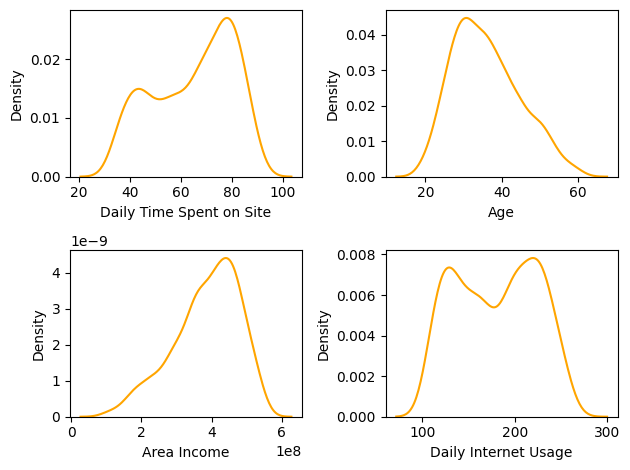

In [10]:
features = Numerical
for i in range (0, len(features)):
  plt.subplot(2,2, i+1)
  sns.kdeplot(x=df[features[i]], color = 'orange')
  plt.xlabel(features[i])
  plt.tight_layout()

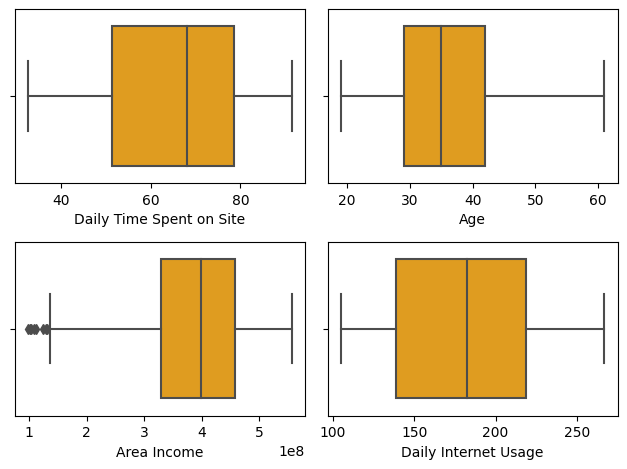

-Pada Data Numerical Bisa dilihat bahawa outliers terpadapat pada data Area Income
-Daily Time Spent on Site, Age, dan Area Income distribusinya sedikit skewed
-Daily Internet Usage distribusinya mendeketi normal


In [11]:
features = Numerical
for i in range(0,len(features)):
  plt.subplot(2,2, i+1)
  sns.boxplot(x=df[features[i]], color = 'orange')
  plt.xlabel(features[i])
  plt.tight_layout()
plt.show()
print(r'-Pada Data Numerical Bisa dilihat bahawa outliers terpadapat pada data Area Income')
print(r'-Daily Time Spent on Site, Age, dan Area Income distribusinya sedikit skewed')
print(r'-Daily Internet Usage distribusinya mendeketi normal')

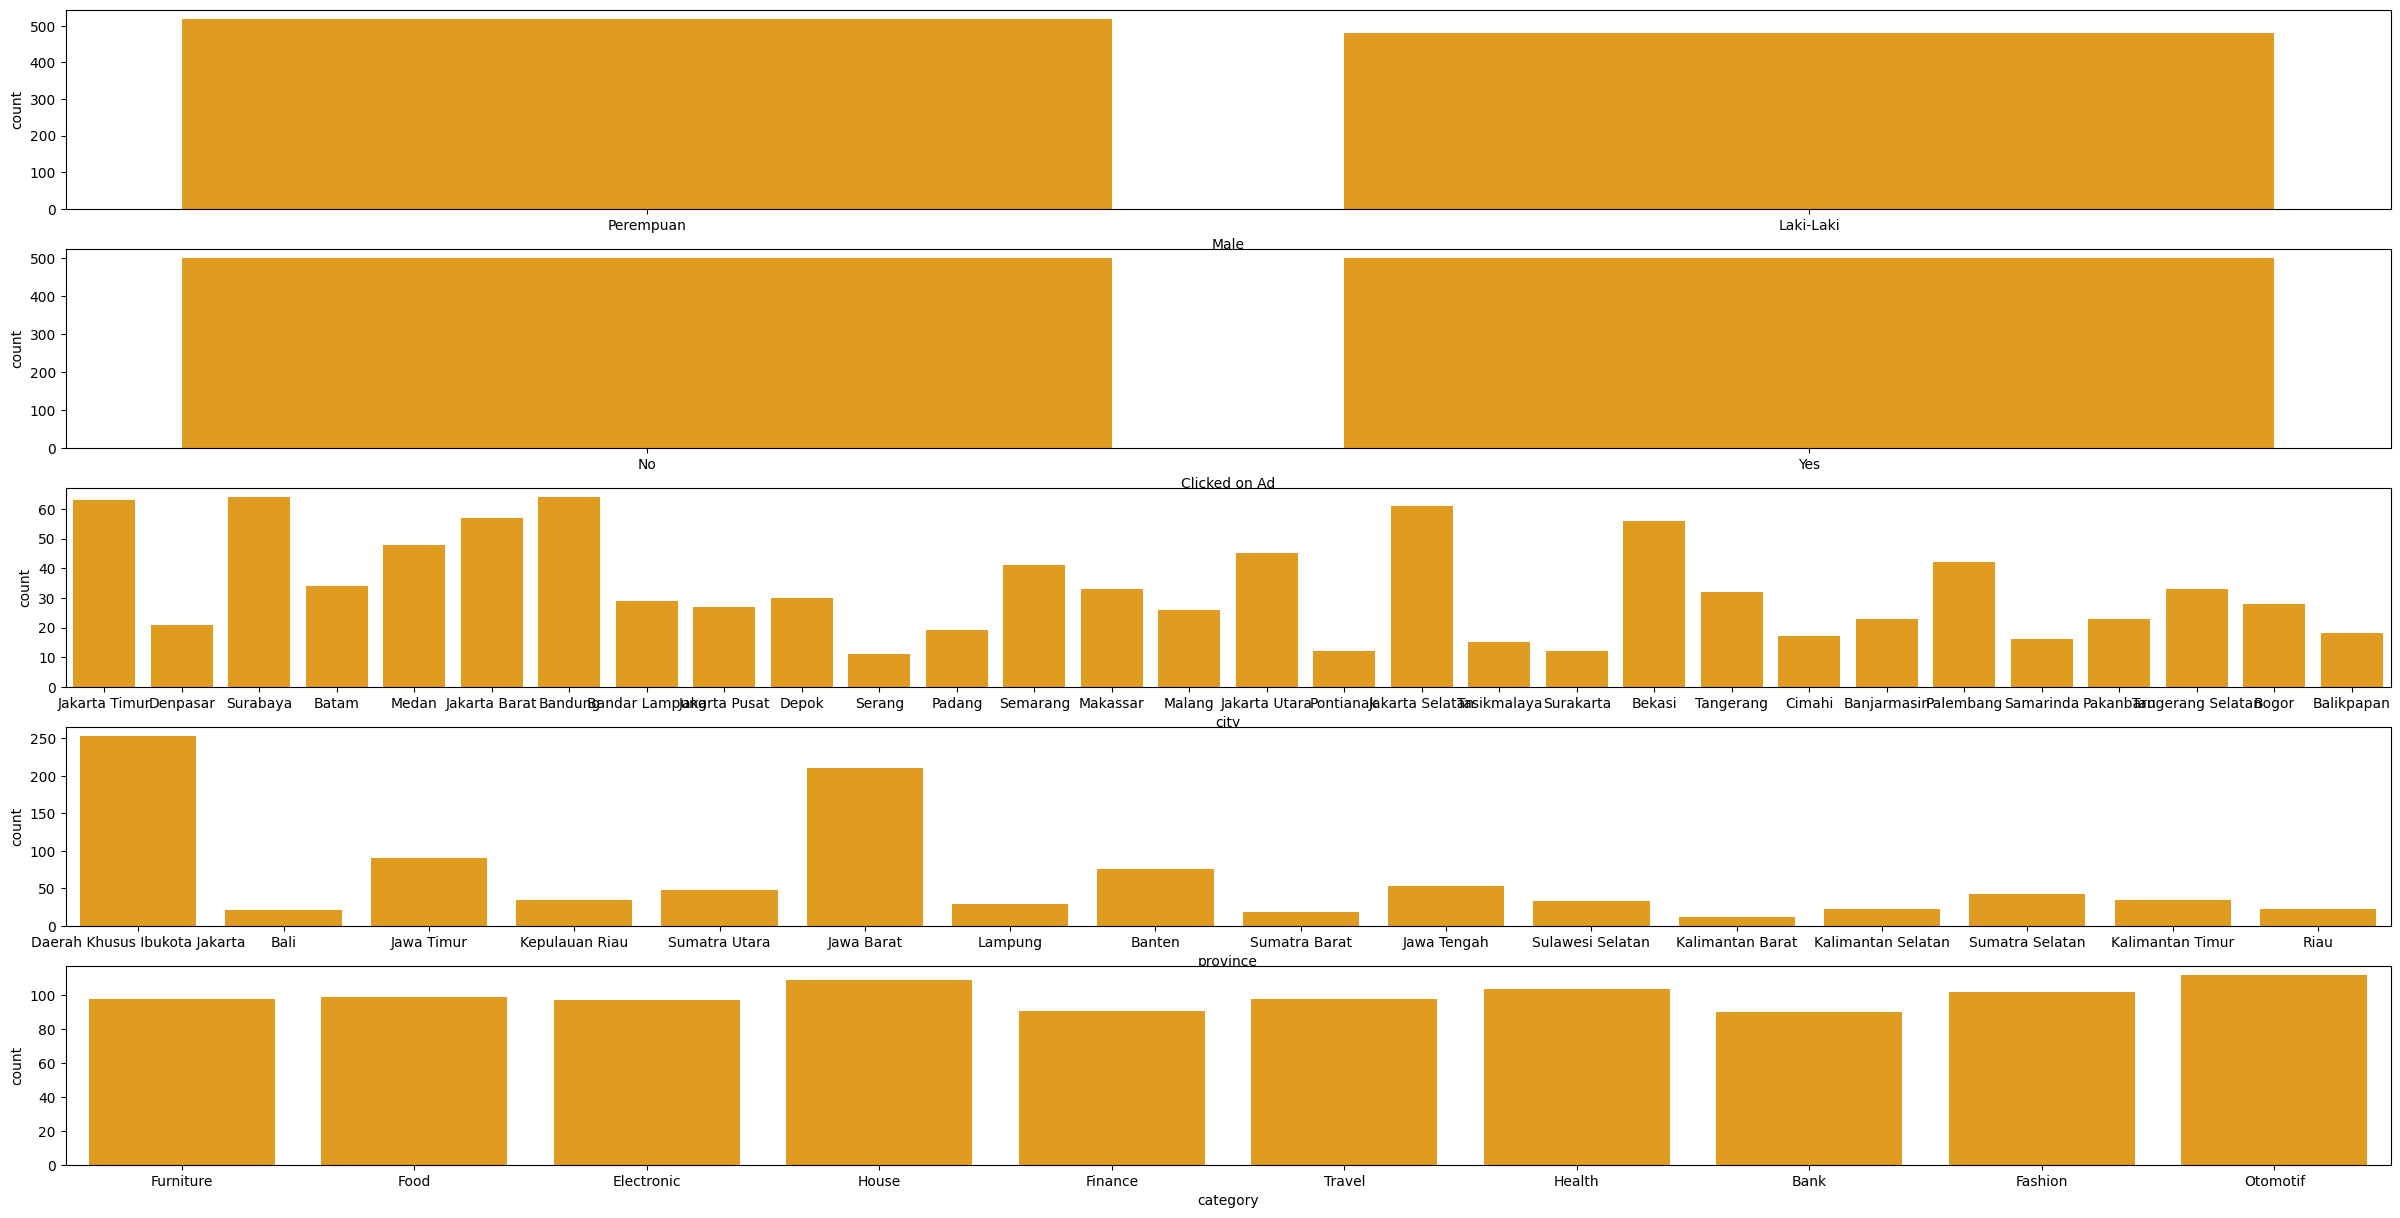

In [12]:
features = Categorical
plt.figure(figsize = (30,15))
for i in range(0, len(features)):
  plt.subplot(5,1, i+1)
  sns.countplot(x=df[features[i]], color = 'orange', orient = 'v')
  plt.xlabel(features[i])

In [13]:
print(df[Categorical].describe().transpose())
print(r'          ')
print(r'-Kolom male di dominasi oleh Perempuan')
print(r'-Click on ad memiliki hasil yang sama')
print(r'-city didominasi oleh Surabaya')
print(r'-Province didominasi oleh DKI Jakarata')
print(r'-Kategory didominasi oleh Otomotif')

              count unique                            top freq
Male            997      2                      Perempuan  518
Clicked on Ad  1000      2                             No  500
city           1000     30                       Surabaya   64
province       1000     16  Daerah Khusus Ibukota Jakarta  253
category       1000     10                       Otomotif  112
          
-Kolom male di dominasi oleh Perempuan
-Click on ad memiliki hasil yang sama
-city didominasi oleh Surabaya
-Province didominasi oleh DKI Jakarata
-Kategory didominasi oleh Otomotif


### Bivariate

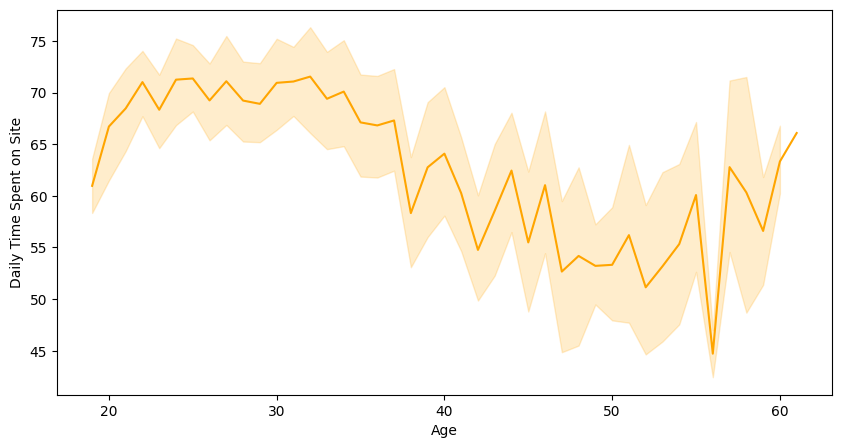

Pada Daily Time Spend on Site denga umur bisa dilihat terjadi penurunan ketika memasuki umur mendekati 40 thn,
dan bisa di tarik kesimpulan bahwa pengguna yang cukup aktif ada di umut 20-40 tahun


In [14]:
plt.figure(figsize = (10,5))
sns.lineplot(data=df, y= 'Daily Time Spent on Site', x= 'Age', color = 'orange')
plt.show()
print(r'Pada Daily Time Spend on Site denga umur bisa dilihat terjadi penurunan ketika memasuki umur mendekati 40 thn,')
print(r'dan bisa di tarik kesimpulan bahwa pengguna yang cukup aktif ada di umut 20-40 tahun')

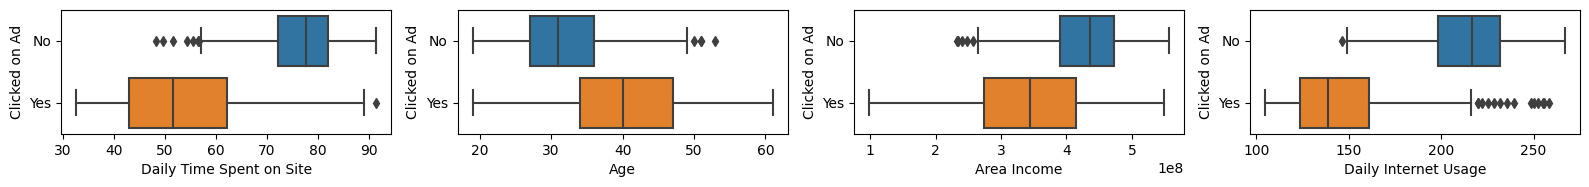

- Untuk Daily Time Spent on site pada cliked ad yes berada di 40 - 60 menit, pada cliked ad no pada 70-80 menit
- Age pada Cliked ad yes berada di umur 35-45, pada cliked no 25-35
- pada area income cliked ad yes kurang lebih pada range 2,7 - 4,2, pada cliked no kurang lebih pada 3,8 - 4,8
- Daily Internet Usage cliked ad yes di 125- 175, pada cliked ad no 200 - 230


In [15]:
plt.figure(figsize=(16, 7))
for i in range(0, len(Numerical)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[Numerical[i]],y=df['Clicked on Ad'])
    plt.xlabel(Numerical[i])
    plt.tight_layout()
plt.show()
print(r'- Untuk Daily Time Spent on site pada cliked ad yes berada di 40 - 60 menit, pada cliked ad no pada 70-80 menit')
print(r'- Age pada Cliked ad yes berada di umur 35-45, pada cliked no 25-35')
print(r'- pada area income cliked ad yes kurang lebih pada range 2,7 - 4,2, pada cliked no kurang lebih pada 3,8 - 4,8')
print(r'- Daily Internet Usage cliked ad yes di 125- 175, pada cliked ad no 200 - 230')

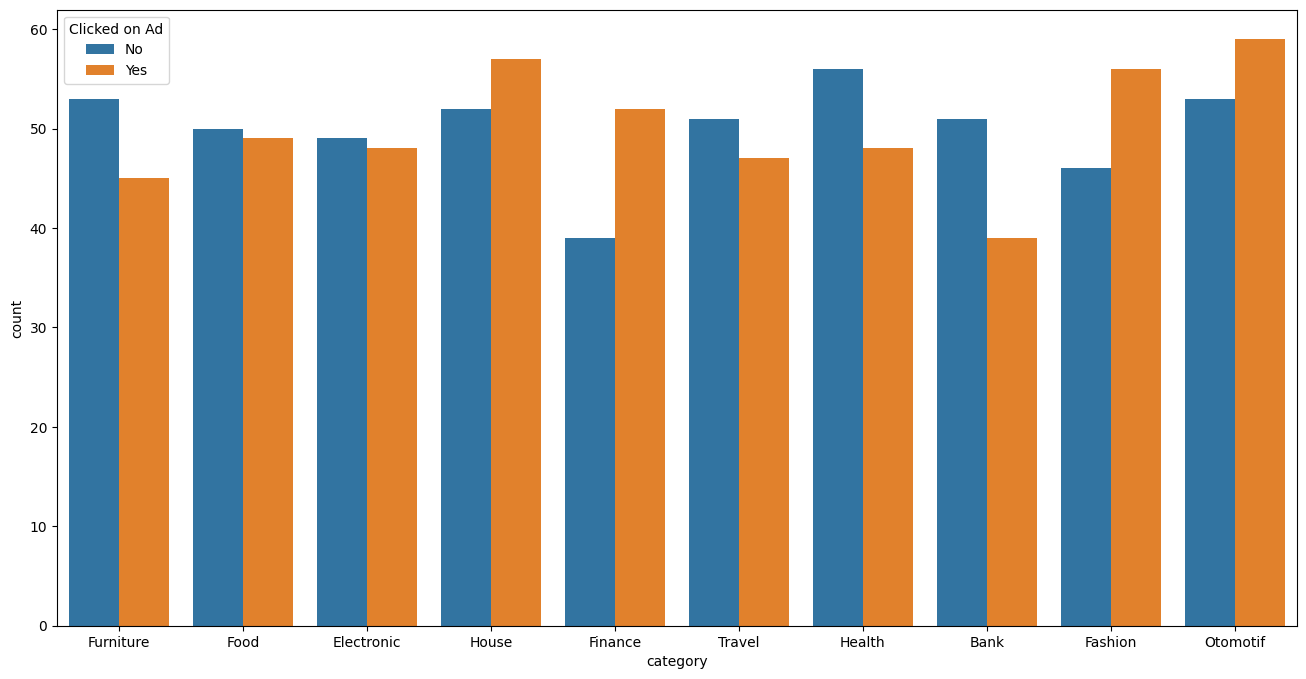

Pada plot di atas dapat dilihat bahwa selisih penggunaan ads tiap categornya hanya berbeda sedikit, dan lebih cenderung banyak kategory yang tidak menggunakan ads pada transaksi.
Pada category House, Finance, Fashion, dan Otomotif penggunaan ads bisa di sebut cukup efektif, untuk penggunaan ads nantinya bisa berfokus pada category tersebut.


In [16]:
plt.figure(figsize = (16,8))
sns.countplot(data=df, x= 'category', hue = 'Clicked on Ad', palette=["C0", "C1", "k"])
plt.show()
print(r'Pada plot di atas dapat dilihat bahwa selisih penggunaan ads tiap categornya hanya berbeda sedikit, dan lebih cenderung banyak kategory yang tidak menggunakan ads pada transaksi.')
print(r'Pada category House, Finance, Fashion, dan Otomotif penggunaan ads bisa di sebut cukup efektif, untuk penggunaan ads nantinya bisa berfokus pada category tersebut.')


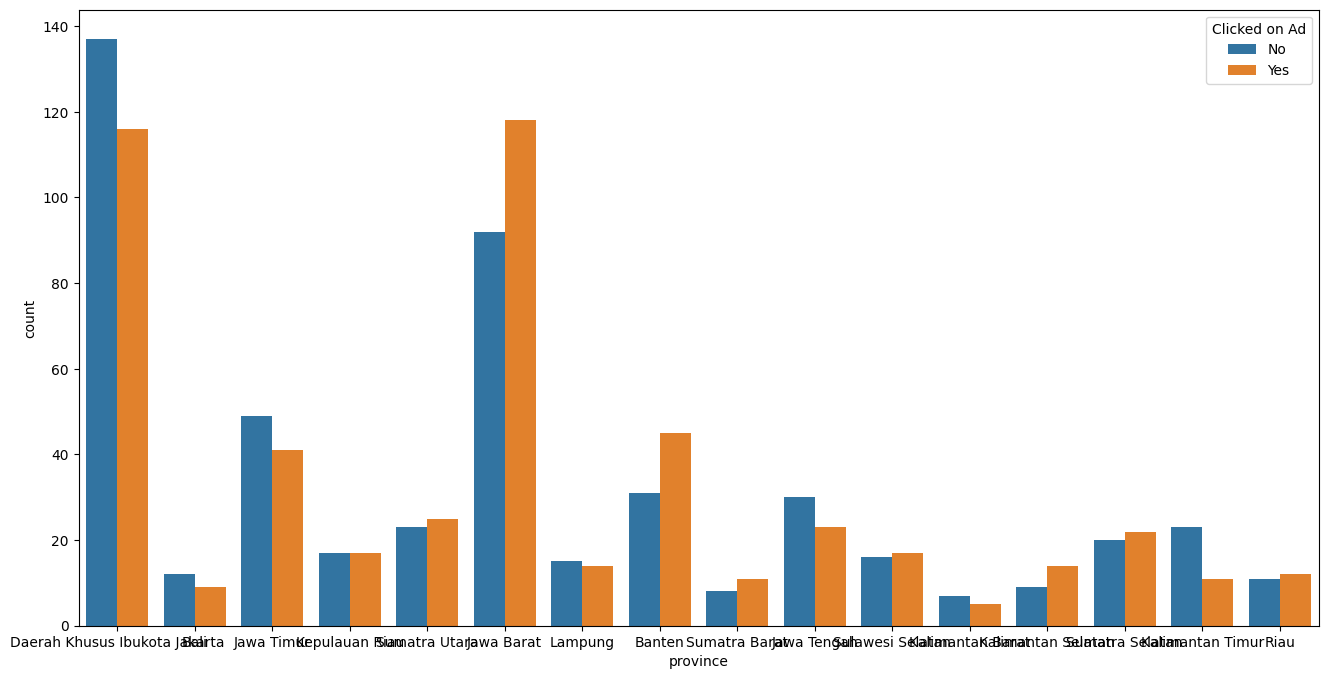

Untuk daerah penggunaan dengan cliked ad yang lebih efektif bisa di lihat di Jawa barat dan banten, hal ini juga bisa menjadi acuan untuk penggunaan ads kedepannya


In [17]:
plt.figure(figsize = (16,8))
sns.countplot(data=df, x= 'province', hue = 'Clicked on Ad')
plt.show()
print(r'Untuk daerah penggunaan dengan cliked ad yang lebih efektif bisa di lihat di Jawa barat dan banten, hal ini juga bisa menjadi acuan untuk penggunaan ads kedepannya')

### Mutivariate

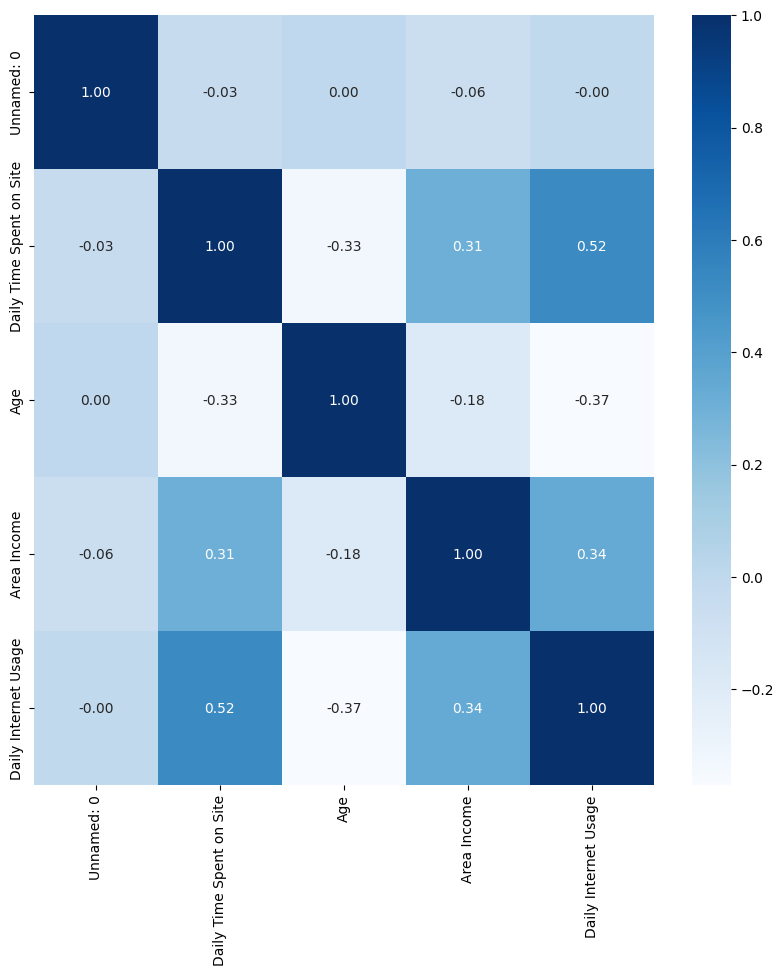

- Feature Daily Time Spent on Site berkorelasi positif cukup kuat dengan Daily Internet Usage, ada kemungkina data redundant
- Feature Age berkorelasi negatif lemah dengan feature Daily Time Spent on Site, Area Income, dan Daily Internet Usage
- Feature Area Income berkorelasi positif dengan feature Daily Time Spent on Site dan Daily Internet Usage dan berkorelasi negatif dengan feature Age


In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f',annot_kws={'size': 10})
plt.show()
print(r'- Feature Daily Time Spent on Site berkorelasi positif cukup kuat dengan Daily Internet Usage, ada kemungkina data redundant')
print(r'- Feature Age berkorelasi negatif lemah dengan feature Daily Time Spent on Site, Area Income, dan Daily Internet Usage')
print(r'- Feature Area Income berkorelasi positif dengan feature Daily Time Spent on Site dan Daily Internet Usage dan berkorelasi negatif dengan feature Age')

# PREPROCESSING

In [19]:
df_pre = df.copy()
df_pre.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Handle Missising data

In [20]:
print(r'check Data yang missing')
print(df_pre.isna().sum())
df_drop = df_pre.dropna()
print(r'               ')
print(r'Setelah drop data missing')
df_drop.isna().sum()

check Data yang missing
Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64
               
Setelah drop data missing


Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## Handling Duplicate data

In [21]:
print(df_drop.duplicated().sum())
print(r'Tidak ada data duplicated')

0
Tidak ada data duplicated


## Handling Outliers

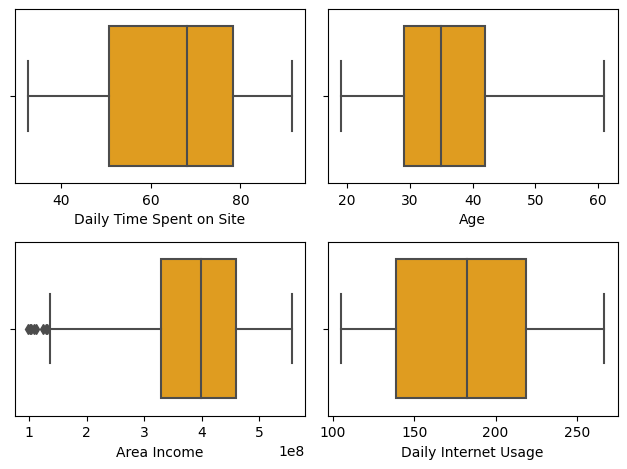

Outliers ada pada data Area income


In [22]:
features = Numerical
for i in range(0,len(features)):
  plt.subplot(2,2, i+1)
  sns.boxplot(x=df_drop[features[i]], color = 'orange')
  plt.xlabel(features[i])
  plt.tight_layout()
plt.show()
print(r'Outliers ada pada data Area income')

In [23]:
features = ['Area Income']

from scipy import stats
filtered_entries = np.array([True] * len(df_drop))

print(f'Jumlah baris sebelum memfilter outlier: {len(df_drop)}')

for col in features:
    zscore = abs(stats.zscore(df_drop[col])) # menghitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_clean = df_drop[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')
print(f'Prsentase outlier: {round((len(df_drop)-len(df_clean))/len(df_drop)*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 963
Jumlah baris setelah memfilter outlier: 960
Prsentase outlier: 0.31%


### Feature Encoding

In [24]:
print(df_clean.Timestamp.dtype)

object


In [25]:
print(r'Mengganti data date dari object ke datetime')

# Menampilkan tipe data sebelum diubah
print('Tipe data sebelum diubah: ', df_clean['Timestamp'].dtype)

# Mengganti tipe data kolom "Timestamp" dari objek ke datetime
df_ready = df_clean.copy()
df_ready.loc[:, 'Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
# Menampilkan tipe data setelah diubah
print('Tipe data setelah diubah: ', df_ready['Timestamp'].dtype)


Mengganti data date dari object ke datetime
Tipe data sebelum diubah:  object
Tipe data setelah diubah:  datetime64[ns]


In [26]:
df_ready.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance


In [27]:
print(r'Merubah data Timestamp')

df_encode = df_ready.copy()

print (r'jumlah data unique data tahun', df_encode.Timestamp.dt.year.nunique())
print (r'jumlah data unique data bulan', df_encode.Timestamp.dt.month.nunique())
print (r'jumlah data unique data hari', df_encode.Timestamp.dt.day.nunique())
print(r'               ')
print(r'Karena data tahun hanya ada 1 dan data hari terlalu banyak maka akan di ambil data bulannya saja sebagai future bulan')

Merubah data Timestamp
jumlah data unique data tahun 1
jumlah data unique data bulan 7
jumlah data unique data hari 31
               
Karena data tahun hanya ada 1 dan data hari terlalu banyak maka akan di ambil data bulannya saja sebagai future bulan


In [28]:
df_encode['Month'] = df_encode['Timestamp'].dt.month

### Label Encoding

In [29]:
print(r'Jumlah unique', df_encode.Male.nunique())
print(r'sebelum encode') 
print(df_encode.Male.value_counts())
#Merubah label
df_encode['Male'] = np.where(df_encode['Male']=='Laki-Laki',1,0)
print(r'setelah encode') 
print(df_encode.Male.value_counts())

Jumlah unique 2
sebelum encode
Perempuan    501
Laki-Laki    459
Name: Male, dtype: int64
setelah encode
0    501
1    459
Name: Male, dtype: int64


In [30]:
print(r'Jumlah unique', df_encode['Clicked on Ad'].nunique())
print(r'sebelum encode') 
print(df_encode['Clicked on Ad'].value_counts())
#Merubah label
df_encode['Clicked on Ad'] = np.where(df_encode['Clicked on Ad']=='Yes',1,0)
print(r'setelah encode') 
print(df_encode['Clicked on Ad'].value_counts())

Jumlah unique 2
sebelum encode
Yes    482
No     478
Name: Clicked on Ad, dtype: int64
setelah encode
1    482
0    478
Name: Clicked on Ad, dtype: int64


In [31]:
df_encode['Timestamp'] = pd.to_datetime(df_encode['Timestamp'])

df_encode['Month'] = df_encode['Timestamp'].dt.month
df_encode['Day of the month'] = df_encode['Timestamp'].dt.day
df_encode["Day of the week"] = df_encode['Timestamp'].dt.dayofweek
df_encode['Hour'] = df_encode['Timestamp'].dt.hour
df_encode = df_encode.drop(['Timestamp'], axis=1)

df_encode.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Month,Day of the month,Day of the week,Hour
0,0,68.95,35,432837300.0,256.09,0,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,6,0
1,1,80.23,31,479092950.0,193.77,1,0,Denpasar,Bali,Food,4,4,0,1
2,2,69.47,26,418501580.0,236.50,0,0,Surabaya,Jawa Timur,Electronic,3,13,6,20
3,3,74.15,29,383643260.0,245.89,1,0,Batam,Kepulauan Riau,House,1,10,6,2
4,4,68.37,35,517229930.0,225.58,0,0,Medan,Sumatra Utara,Finance,6,3,4,3


## One Hot Encoding

In [32]:
to_ohe = ['province','category', 'city']

In [33]:
df_encode[to_ohe].columns

Index(['province', 'category', 'city'], dtype='object')

In [34]:
for cat in to_ohe :
  onehots = pd.get_dummies(df_encode[cat], prefix=cat)
  df_encode = df_encode.join(onehots)

In [35]:

df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 999
Data columns (total 70 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              960 non-null    int64  
 1   Daily Time Spent on Site                960 non-null    float64
 2   Age                                     960 non-null    int64  
 3   Area Income                             960 non-null    float64
 4   Daily Internet Usage                    960 non-null    float64
 5   Male                                    960 non-null    int64  
 6   Clicked on Ad                           960 non-null    int64  
 7   city                                    960 non-null    object 
 8   province                                960 non-null    object 
 9   category                                960 non-null    object 
 10  Month                                   960 non-null    int64 

### Data Selection

In [36]:
df_encode.drop(columns=['Unnamed: 0','city','province','category','Daily Internet Usage'], inplace=True)

In [37]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 999
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Daily Time Spent on Site                960 non-null    float64
 1   Age                                     960 non-null    int64  
 2   Area Income                             960 non-null    float64
 3   Male                                    960 non-null    int64  
 4   Clicked on Ad                           960 non-null    int64  
 5   Month                                   960 non-null    int64  
 6   Day of the month                        960 non-null    int64  
 7   Day of the week                         960 non-null    int64  
 8   Hour                                    960 non-null    int64  
 9   province_Bali                           960 non-null    uint8  
 10  province_Banten                         960 non-null    uint8 

# Modeling

## Split Data set

In [38]:
X = df_encode.drop(columns='Clicked on Ad').copy()
                      
y = df_encode['Clicked on Ad'].copy()

In [39]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the data splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (672, 64)
y_train shape: (672,)
X_test shape: (288, 64)
y_test shape: (288,)


###Experiment Modeling 

#### Logistic Regression with Normalization, with standarization , and without

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without normalization/standardization
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_score_train = accuracy_score(y_train, lr.predict(X_train))
precision_train = precision_score(y_train, lr.predict(X_train))
recall_train = recall_score(y_train, lr.predict(X_train))
f1_train = f1_score(y_train, lr.predict(X_train))
acc_score_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
print("Without normalization/standardization:")
print("Training accuracy:", acc_score_train)
print("Training precision:", precision_train)
print("Training recall:", recall_train)
print("Training F1 score:", f1_train)
print("Testing accuracy:", acc_score_test)
print("Testing precision:", precision_test)
print("Testing recall:", recall_test)
print("Testing F1 score:", f1_test)
print()

# With normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
lr_norm = LogisticRegression()
lr_norm.fit(X_train_norm, y_train)
y_pred_norm = lr_norm.predict(X_test_norm)
acc_score_train_norm = accuracy_score(y_train, lr_norm.predict(X_train_norm))
precision_train_norm = precision_score(y_train, lr_norm.predict(X_train_norm))
recall_train_norm = recall_score(y_train, lr_norm.predict(X_train_norm))
f1_train_norm = f1_score(y_train, lr_norm.predict(X_train_norm))
acc_score_test_norm = accuracy_score(y_test, y_pred_norm)
precision_test_norm = precision_score(y_test, y_pred_norm)
recall_test_norm = recall_score(y_test, y_pred_norm)
f1_test_norm = f1_score(y_test, y_pred_norm)
print("With normalization:")
print("Training accuracy:", acc_score_train_norm)
print("Training precision:", precision_train_norm)
print("Training recall:", recall_train_norm)
print("Training F1 score:", f1_train_norm)
print("Testing accuracy:", acc_score_test_norm)
print("Testing precision:", precision_test_norm)
print("Testing recall:", recall_test_norm)
print("Testing F1 score:", f1_test_norm)
print()

# With standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
lr_std = LogisticRegression()
lr_std.fit(X_train_std, y_train)
y_pred_std = lr_std.predict(X_test_std)
acc_score_train_std = accuracy_score(y_train, lr_std.predict(X_train_std))
precision_train_std = precision_score(y_train, lr_std.predict(X_train_std))
recall_train_std = recall_score(y_train, lr_std.predict(X_train_std))
f1_train_std = f1_score(y_train, lr_std.predict(X_train_std))
acc_score_test_std = accuracy_score(y_test, y_pred_std)
precision_test_std = precision_score(y_test, y_pred_std)
recall_test_std = recall_score(y_test, y_pred_std)
f1_test_std = f1_score(y_test, y_pred_std)
print("With standardization:")
print("Training accuracy:", acc_score_train_std)
print("Training precision:", precision_train)
print("Training recall:", precision_train_std)
print("Training F1 score:", f1_train_std)
print("Testing accuracy:", acc_score_test_std)
print("Testing precision:", precision_test_std)
print("Testing recall:", recall_test_std)
print("Testing F1 score:", f1_test_std)
print()


Without normalization/standardization:
Training accuracy: 0.5
Training precision: 0.0
Training recall: 0.0
Training F1 score: 0.0
Testing accuracy: 0.4930555555555556
Testing precision: 0.0
Testing recall: 0.0
Testing F1 score: 0.0

With normalization:
Training accuracy: 0.9270833333333334
Training precision: 0.9614147909967846
Training recall: 0.8898809523809523
Training F1 score: 0.9242658423493044
Testing accuracy: 0.9201388888888888
Testing precision: 0.9183673469387755
Testing recall: 0.9246575342465754
Testing F1 score: 0.9215017064846416

With standardization:
Training accuracy: 0.9345238095238095
Training precision: 0.0
Training recall: 0.9506172839506173
Training F1 score: 0.9333333333333332
Testing accuracy: 0.8993055555555556
Testing precision: 0.8774193548387097
Testing recall: 0.9315068493150684
Testing F1 score: 0.9036544850498338



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


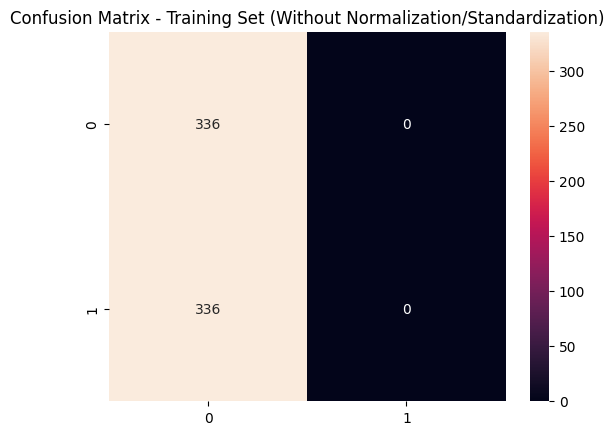

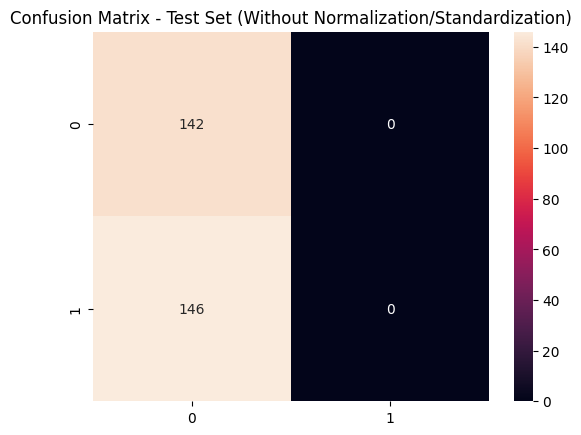

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Without normalization/standardization
cm_train = confusion_matrix(y_train, lr.predict(X_train))
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_train, annot=True, fmt="d")
plt.title("Confusion Matrix - Training Set (Without Normalization/Standardization)")
plt.show()
sns.heatmap(cm_test, annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set (Without Normalization/Standardization)")
plt.show()



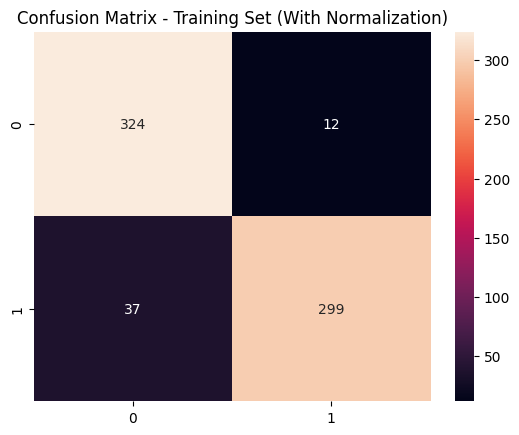

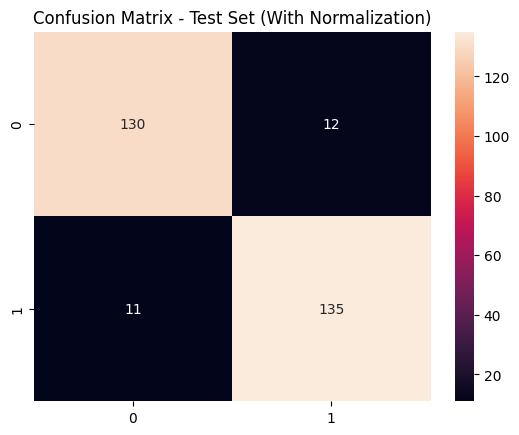

In [42]:
# With normalization
cm_train_norm = confusion_matrix(y_train, lr_norm.predict(X_train_norm))
cm_test_norm = confusion_matrix(y_test, y_pred_norm)
sns.heatmap(cm_train_norm, annot=True, fmt="d")
plt.title("Confusion Matrix - Training Set (With Normalization)")
plt.show()
sns.heatmap(cm_test_norm, annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set (With Normalization)")
plt.show()

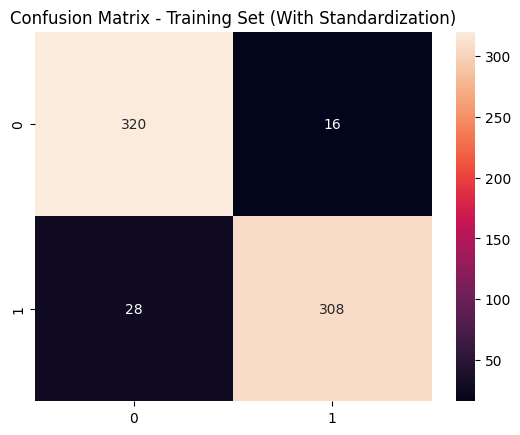

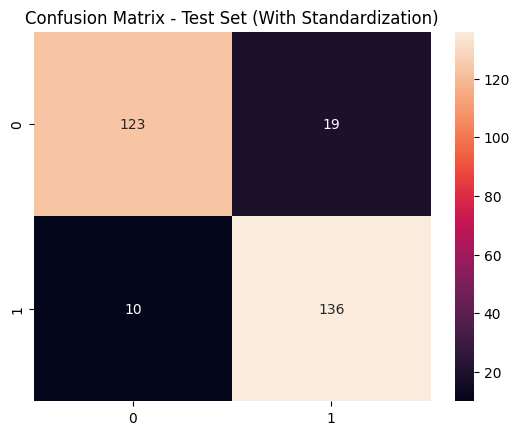

In [43]:
# With standardization
cm_train_std = confusion_matrix(y_train, lr_std.predict(X_train_std))
cm_test_std = confusion_matrix(y_test, y_pred_std)
sns.heatmap(cm_train_std, annot=True, fmt="d")
plt.title("Confusion Matrix - Training Set (With Standardization)")
plt.show()
sns.heatmap(cm_test_std, annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set (With Standardization)")
plt.show()

#### Random Forest with Normalization, with standarization , and without

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without normalization/standardization
IrRF = RandomForestClassifier()
IrRF.fit(X_train, y_train)
y_pred = IrRF.predict(X_test)
acc_score_train = accuracy_score(y_train, IrRF.predict(X_train))
precision_train = precision_score(y_train, IrRF.predict(X_train))
recall_train = recall_score(y_train, IrRF.predict(X_train))
f1_train = f1_score(y_train, IrRF.predict(X_train))
acc_score_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
print("Without normalization/standardization:")
print("Training accuracy:", acc_score_train)
print("Training precision:", precision_train)
print("Training recall:", recall_train)
print("Training F1 score:", f1_train)
print("Testing accuracy:", acc_score_test)
print("Testing precision:", precision_test)
print("Testing recall:", recall_test)
print("Testing F1 score:", f1_test)
print()

# With normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
IrRF_norm = LogisticRegression()
IrRF_norm.fit(X_train_norm, y_train)
y_pred_norm = IrRF_norm.predict(X_test_norm)
acc_score_train_norm = accuracy_score(y_train, IrRF_norm.predict(X_train_norm))
precision_train_norm = precision_score(y_train, IrRF_norm.predict(X_train_norm))
recall_train_norm = recall_score(y_train, IrRF_norm.predict(X_train_norm))
f1_train_norm = f1_score(y_train, IrRF_norm.predict(X_train_norm))
acc_score_test_norm = accuracy_score(y_test, y_pred_norm)
precision_test_norm = precision_score(y_test, y_pred_norm)
recall_test_norm = recall_score(y_test, y_pred_norm)
f1_test_norm = f1_score(y_test, y_pred_norm)
print("With normalization:")
print("Training accuracy:", acc_score_train_norm)
print("Training precision:", precision_train_norm)
print("Training recall:", recall_train_norm)
print("Training F1 score:", f1_train_norm)
print("Testing accuracy:", acc_score_test_norm)
print("Testing precision:", precision_test_norm)
print("Testing recall:", recall_test_norm)
print("Testing F1 score:", f1_test_norm)
print()

# With standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
IrRF_std = LogisticRegression()
IrRF_std.fit(X_train_std, y_train)
y_pred_std = IrRF_std.predict(X_test_std)
acc_score_train_std = accuracy_score(y_train, IrRF_std.predict(X_train_std))
precision_train_std = precision_score(y_train, IrRF_std.predict(X_train_std))
recall_train_std = recall_score(y_train, IrRF_std.predict(X_train_std))
f1_train_std = f1_score(y_train, IrRF_std.predict(X_train_std))
acc_score_test_std = accuracy_score(y_test, y_pred_std)
precision_test_std = precision_score(y_test, y_pred_std)
recall_test_std = recall_score(y_test, y_pred_std)
f1_test_std = f1_score(y_test, y_pred_std)
print("With standardization:")
print("Training accuracy:", acc_score_train_std)
print("Training precision:", precision_train)
print("Training recall:", precision_train_std)
print("Training F1 score:", f1_train_std)
print("Testing accuracy:", acc_score_test_std)
print("Testing precision:", precision_test_std)
print("Testing recall:", recall_test_std)
print("Testing F1 score:", f1_test_std)
print()


Without normalization/standardization:
Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Training F1 score: 1.0
Testing accuracy: 0.8993055555555556
Testing precision: 0.8823529411764706
Testing recall: 0.9246575342465754
Testing F1 score: 0.9030100334448161

With normalization:
Training accuracy: 0.9270833333333334
Training precision: 0.9614147909967846
Training recall: 0.8898809523809523
Training F1 score: 0.9242658423493044
Testing accuracy: 0.9201388888888888
Testing precision: 0.9183673469387755
Testing recall: 0.9246575342465754
Testing F1 score: 0.9215017064846416

With standardization:
Training accuracy: 0.9345238095238095
Training precision: 1.0
Training recall: 0.9506172839506173
Training F1 score: 0.9333333333333332
Testing accuracy: 0.8993055555555556
Testing precision: 0.8774193548387097
Testing recall: 0.9315068493150684
Testing F1 score: 0.9036544850498338



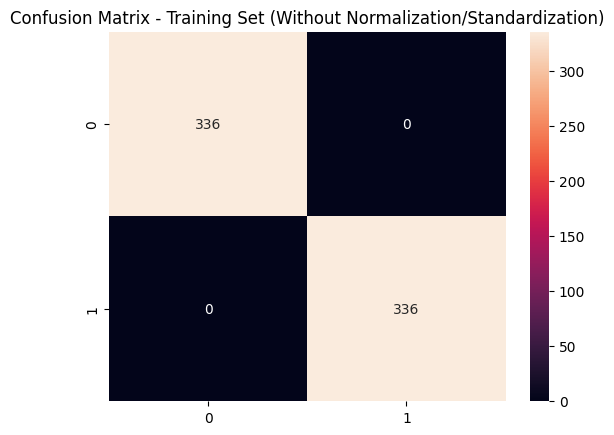

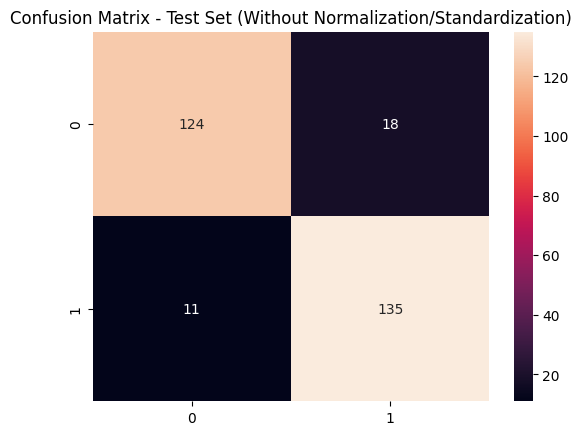

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Without normalization/standardization
cm_train = confusion_matrix(y_train, IrRF.predict(X_train))
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_train, annot=True, fmt="d")
plt.title("Confusion Matrix - Training Set (Without Normalization/Standardization)")
plt.show()
sns.heatmap(cm_test, annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set (Without Normalization/Standardization)")
plt.show()



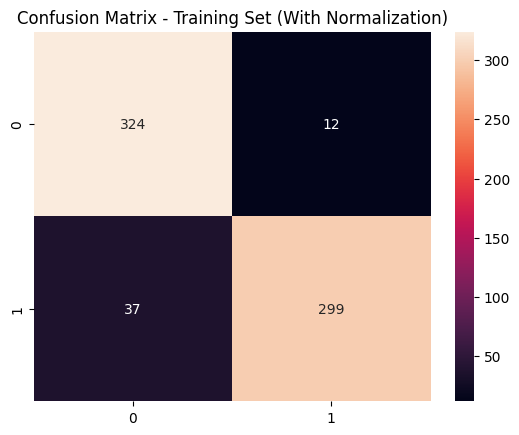

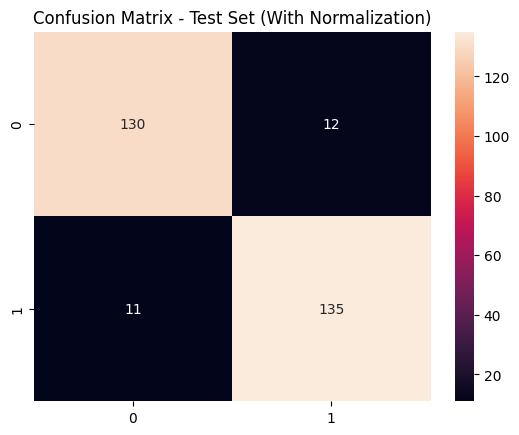

In [46]:

# With normalization
cm_train_norm = confusion_matrix(y_train, IrRF_norm.predict(X_train_norm))
cm_test_norm = confusion_matrix(y_test, y_pred_norm)
sns.heatmap(cm_train_norm, annot=True, fmt="d")
plt.title("Confusion Matrix - Training Set (With Normalization)")
plt.show()
sns.heatmap(cm_test_norm, annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set (With Normalization)")
plt.show()



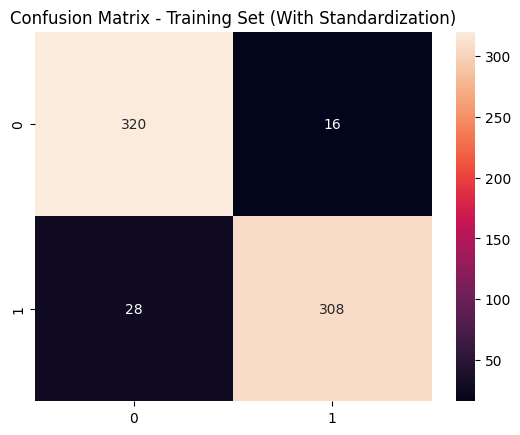

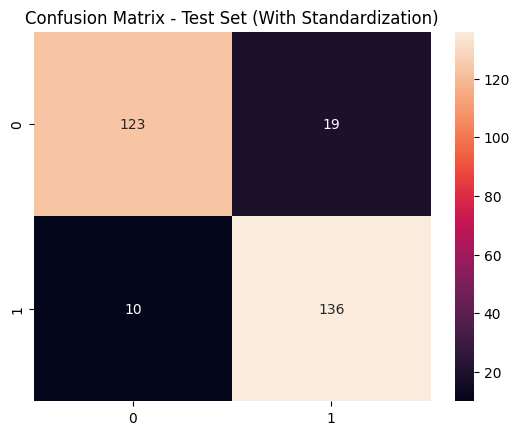

In [47]:
# With standardization
cm_train_std = confusion_matrix(y_train, IrRF_std.predict(X_train_std))
cm_test_std = confusion_matrix(y_test, y_pred_std)
sns.heatmap(cm_train_std, annot=True, fmt="d")
plt.title("Confusion Matrix - Training Set (With Standardization)")
plt.show()
sns.heatmap(cm_test_std, annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set (With Standardization)")
plt.show()

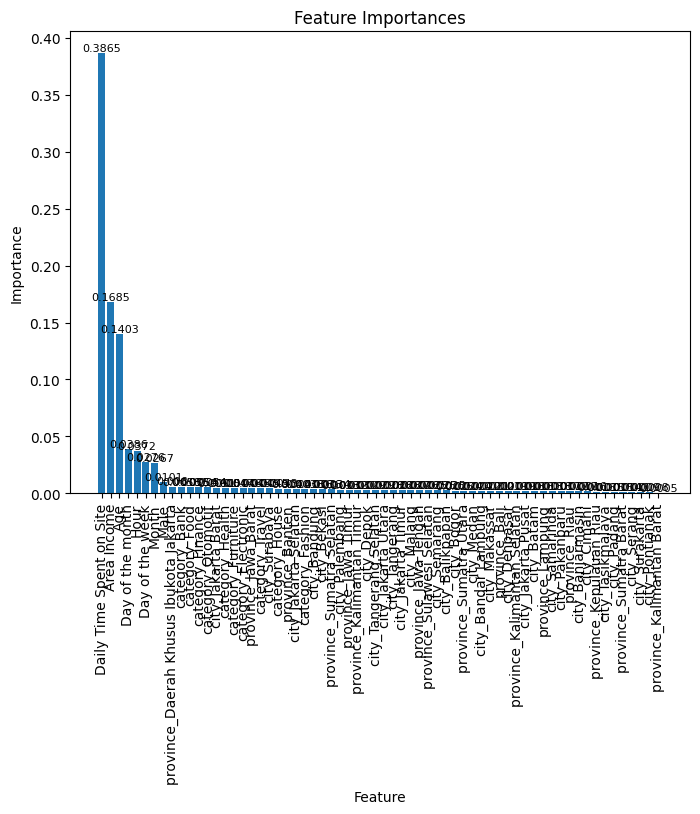

Top 2 important features: Index(['Daily Time Spent on Site', 'Area Income'], dtype='object')


In [48]:
# Get feature importances and sort them in descending order
importance = IrRF.feature_importances_
sorted_idx = importance.argsort()[::-1]
features_sorted = X.columns[sorted_idx]
importance_sorted = importance[sorted_idx]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(features_sorted, importance_sorted)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
for i, v in enumerate(importance_sorted):
    plt.text(i, v, round(v, 4), ha='center', fontsize=8, va='bottom')
plt.show()

# Print top 2 important features
top2_features = features_sorted[:2]
print('Top 2 important features:', top2_features)


#### Decission Tree with Normalization, with standarization , and without

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without normalization/standardization
IrDTC = DecisionTreeClassifier()
IrDTC.fit(X_train, y_train)
y_pred = IrDTC.predict(X_test)
acc_score_train = accuracy_score(y_train, IrDTC.predict(X_train))
precision_train = precision_score(y_train, IrDTC.predict(X_train))
recall_train = recall_score(y_train, IrDTC.predict(X_train))
f1_train = f1_score(y_train, IrDTC.predict(X_train))
acc_score_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
print("Without normalization/standardization:")
print("Training accuracy:", acc_score_train)
print("Training precision:", precision_train)
print("Training recall:", recall_train)
print("Training F1 score:", f1_train)
print("Testing accuracy:", acc_score_test)
print("Testing precision:", precision_test)
print("Testing recall:", recall_test)
print("Testing F1 score:", f1_test)
print()

# With normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
IrDTC_norm = LogisticRegression()
IrDTC_norm.fit(X_train_norm, y_train)
y_pred_norm = IrDTC_norm.predict(X_test_norm)
acc_score_train_norm = accuracy_score(y_train, IrDTC_norm.predict(X_train_norm))
precision_train_norm = precision_score(y_train, IrDTC_norm.predict(X_train_norm))
recall_train_norm = recall_score(y_train, IrDTC_norm.predict(X_train_norm))
f1_train_norm = f1_score(y_train, IrDTC_norm.predict(X_train_norm))
acc_score_test_norm = accuracy_score(y_test, y_pred_norm)
precision_test_norm = precision_score(y_test, y_pred_norm)
recall_test_norm = recall_score(y_test, y_pred_norm)
f1_test_norm = f1_score(y_test, y_pred_norm)
print("With normalization:")
print("Training accuracy:", acc_score_train_norm)
print("Training precision:", precision_train_norm)
print("Training recall:", recall_train_norm)
print("Training F1 score:", f1_train_norm)
print("Testing accuracy:", acc_score_test_norm)
print("Testing precision:", precision_test_norm)
print("Testing recall:", recall_test_norm)
print("Testing F1 score:", f1_test_norm)
print()

# With standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
IrDTC_std = LogisticRegression()
IrDTC_std.fit(X_train_std, y_train)
y_pred_std = IrDTC_std.predict(X_test_std)
acc_score_train_std = accuracy_score(y_train, IrDTC_std.predict(X_train_std))
precision_train_std = precision_score(y_train, IrDTC_std.predict(X_train_std))
recall_train_std = recall_score(y_train, IrDTC_std.predict(X_train_std))
f1_train_std = f1_score(y_train, IrDTC_std.predict(X_train_std))
acc_score_test_std = accuracy_score(y_test, y_pred_std)
precision_test_std = precision_score(y_test, y_pred_std)
recall_test_std = recall_score(y_test, y_pred_std)
f1_test_std = f1_score(y_test, y_pred_std)
print("With standardization:")
print("Training accuracy:", acc_score_train_std)
print("Training precision:", precision_train)
print("Training recall:", precision_train_std)
print("Training F1 score:", f1_train_std)
print("Testing accuracy:", acc_score_test_std)
print("Testing precision:", precision_test_std)
print("Testing recall:", recall_test_std)
print("Testing F1 score:", f1_test_std)
print()


Without normalization/standardization:
Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Training F1 score: 1.0
Testing accuracy: 0.8333333333333334
Testing precision: 0.80625
Testing recall: 0.8835616438356164
Testing F1 score: 0.8431372549019608

With normalization:
Training accuracy: 0.9270833333333334
Training precision: 0.9614147909967846
Training recall: 0.8898809523809523
Training F1 score: 0.9242658423493044
Testing accuracy: 0.9201388888888888
Testing precision: 0.9183673469387755
Testing recall: 0.9246575342465754
Testing F1 score: 0.9215017064846416

With standardization:
Training accuracy: 0.9345238095238095
Training precision: 1.0
Training recall: 0.9506172839506173
Training F1 score: 0.9333333333333332
Testing accuracy: 0.8993055555555556
Testing precision: 0.8774193548387097
Testing recall: 0.9315068493150684
Testing F1 score: 0.9036544850498338



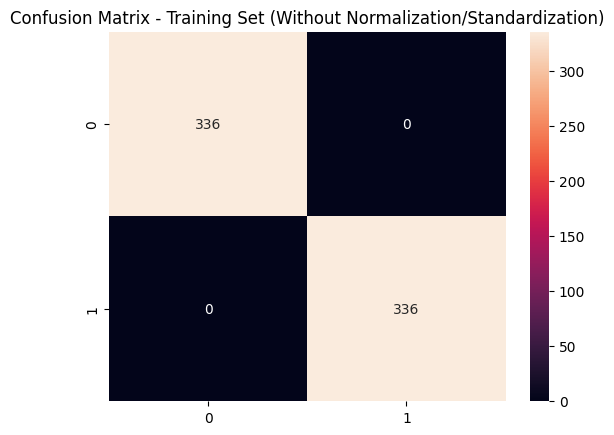

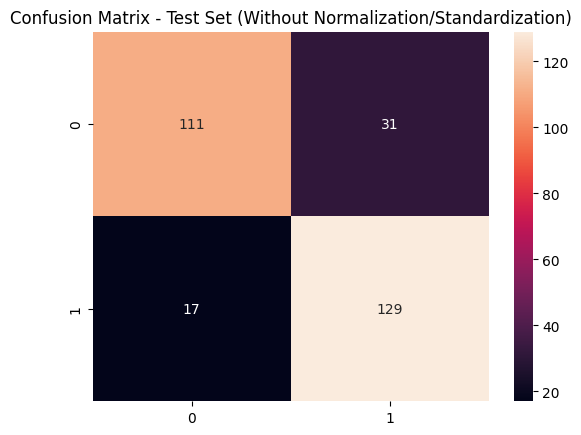

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Without normalization/standardization
cm_train = confusion_matrix(y_train, IrDTC.predict(X_train))
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_train, annot=True, fmt="d")
plt.title("Confusion Matrix - Training Set (Without Normalization/Standardization)")
plt.show()
sns.heatmap(cm_test, annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set (Without Normalization/Standardization)")
plt.show()



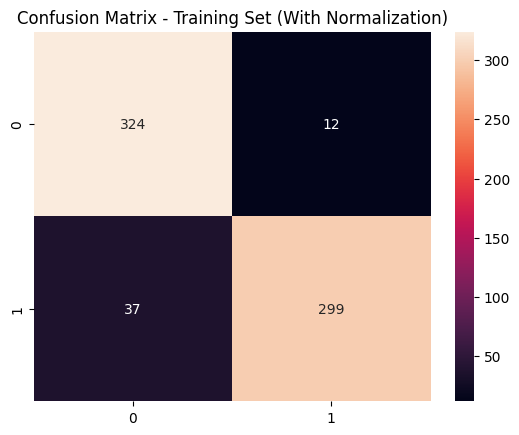

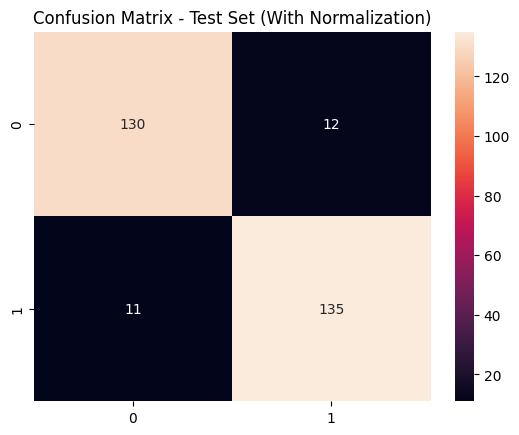

In [51]:

# With normalization
cm_train_norm = confusion_matrix(y_train, IrDTC_norm.predict(X_train_norm))
cm_test_norm = confusion_matrix(y_test, y_pred_norm)
sns.heatmap(cm_train_norm, annot=True, fmt="d")
plt.title("Confusion Matrix - Training Set (With Normalization)")
plt.show()
sns.heatmap(cm_test_norm, annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set (With Normalization)")
plt.show()

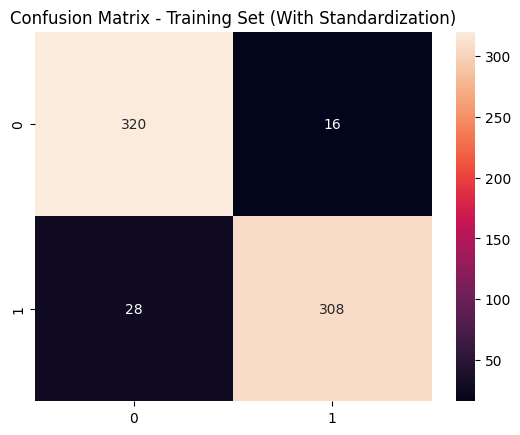

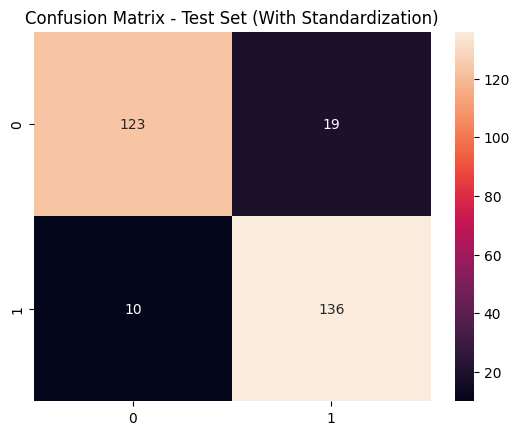

In [52]:
# With standardization
cm_train_std = confusion_matrix(y_train, IrDTC_std.predict(X_train_std))
cm_test_std = confusion_matrix(y_test, y_pred_std)
sns.heatmap(cm_train_std, annot=True, fmt="d")
plt.title("Confusion Matrix - Training Set (With Standardization)")
plt.show()
sns.heatmap(cm_test_std, annot=True, fmt="d")
plt.title("Confusion Matrix - Test Set (With Standardization)")
plt.show()

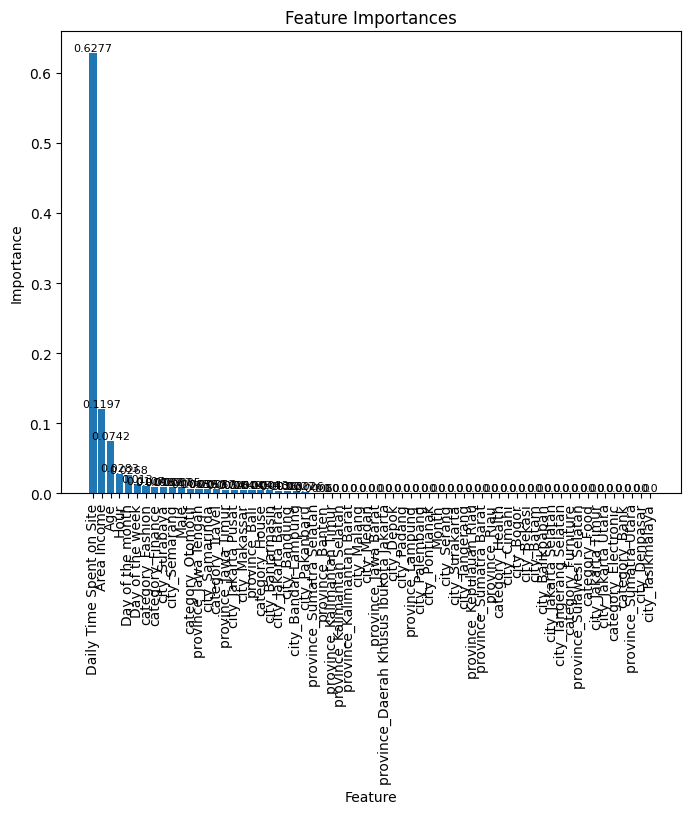

Top 2 important features: Index(['Daily Time Spent on Site', 'Area Income'], dtype='object')


In [53]:
# Get feature importances and sort them in descending order
importance = IrDTC.feature_importances_
sorted_idx = importance.argsort()[::-1]
features_sorted = X.columns[sorted_idx]
importance_sorted = importance[sorted_idx]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(features_sorted, importance_sorted)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
for i, v in enumerate(importance_sorted):
    plt.text(i, v, round(v, 4), ha='center', fontsize=8, va='bottom')
plt.show()

# Print top 2 important features
top2_features = features_sorted[:2]
print('Top 2 important features:', top2_features)


### Simulation

In [54]:
df_final = df_encode.copy()
df_final.shape

(960, 65)

In [55]:
df_final.head()

,Daily Time Spent on Site,Age,Area Income,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour,province_Bali,...,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya
0,68.95,35,432837300.0,0,0,3,27,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,479092950.0,1,0,4,4,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,418501580.0,0,0,3,13,6,20,0,...,0,0,0,0,0,1,0,0,0,0
3,74.15,29,383643260.0,1,0,1,10,6,2,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,517229930.0,0,0,6,3,4,3,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
def group(x):
  if x['Age']>54:
    result = 'pensiun'
  elif x['Age']>45 and x['Age']<=54:
    result = 'pra-pensiun'
  elif x['Age']>35 and x['Age']<=45:
    result = 'paruh baya'
  elif x['Age']>25 and x['Age']<=35:
    result = 'awal pekerja'
  elif x['Age']>15 and x['Age']<=25:
    result = 'muda'
  return result
df_final['age_group'] = df_final.apply(lambda x: group(x),axis=1)

In [57]:
import pandas as pd
import numpy as np

# define the bins (kelompok) based on the minimum and maximum income values
min_income = df_final['Area Income'].min()
max_income = df_final['Area Income'].max()
bins = pd.cut(df_final['Area Income'], bins=5, labels=False, include_lowest=True, retbins=True)[1]

# create labels for the bins
labels = [f'{int(bins[i]/1000)}k - {int(bins[i+1]/1000)}k' for i in range(len(bins)-1)]

# create a new column in the DataFrame with the income groups
df_final['income_group'] = pd.cut(df_final['Area Income'], bins=bins, labels=labels)

# print the DataFrame
df_final.income_group.value_counts()



377511k - 466952k    367
288070k - 377511k    254
466952k - 556393k    191
198629k - 288070k    103
108740k - 198629k     45
Name: income_group, dtype: int64

In [58]:
df_final[['Area Income','income_group']].sample(5)

,Area Income,income_group
150,483789880.0,466952k - 556393k
388,524323870.0,466952k - 556393k
736,400259370.0,377511k - 466952k
668,232030330.0,198629k - 288070k
713,318256750.0,288070k - 377511k


In [59]:
df_final[['Age','age_group']].sample(5)

,Age,age_group
267,34,awal pekerja
197,36,paruh baya
825,36,paruh baya
410,33,awal pekerja
680,26,awal pekerja


In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 999
Data columns (total 67 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Daily Time Spent on Site                960 non-null    float64 
 1   Age                                     960 non-null    int64   
 2   Area Income                             960 non-null    float64 
 3   Male                                    960 non-null    int64   
 4   Clicked on Ad                           960 non-null    int64   
 5   Month                                   960 non-null    int64   
 6   Day of the month                        960 non-null    int64   
 7   Day of the week                         960 non-null    int64   
 8   Hour                                    960 non-null    int64   
 9   province_Bali                           960 non-null    uint8   
 10  province_Banten                         960 non-nu

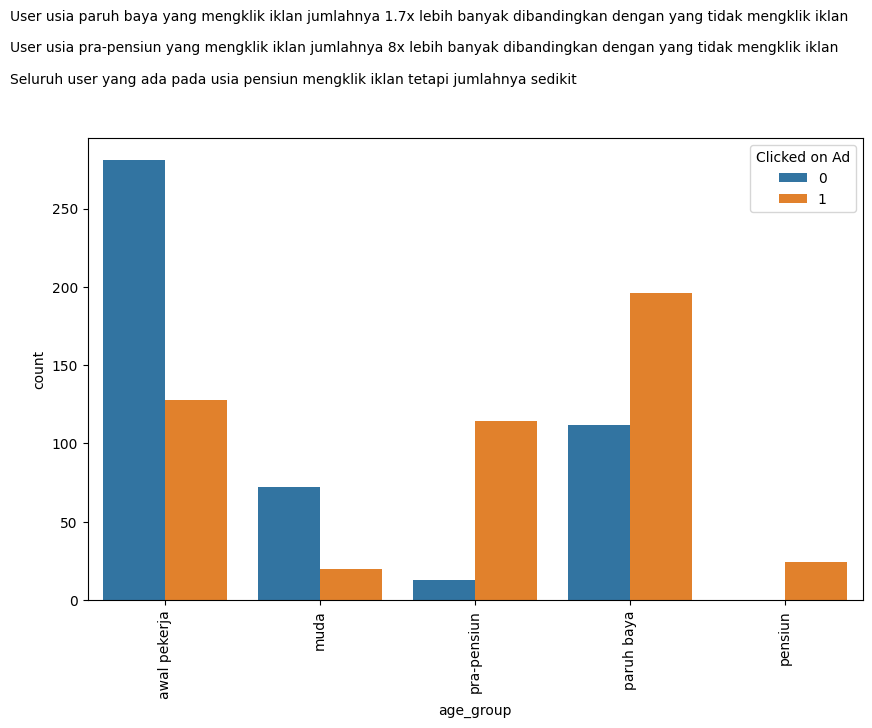

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_group', data= df_final, hue ='Clicked on Ad')
plt.text(x=-1,y=370,s='User usia paruh baya yang mengklik iklan jumlahnya 1.7x lebih banyak dibandingkan dengan yang tidak mengklik iklan')
plt.text(x=-1,y=350,s='User usia pra-pensiun yang mengklik iklan jumlahnya 8x lebih banyak dibandingkan dengan yang tidak mengklik iklan')
plt.text(x=-1,y=330,s='Seluruh user yang ada pada usia pensiun mengklik iklan tetapi jumlahnya sedikit')
plt.xticks(rotation=90)
plt.show()

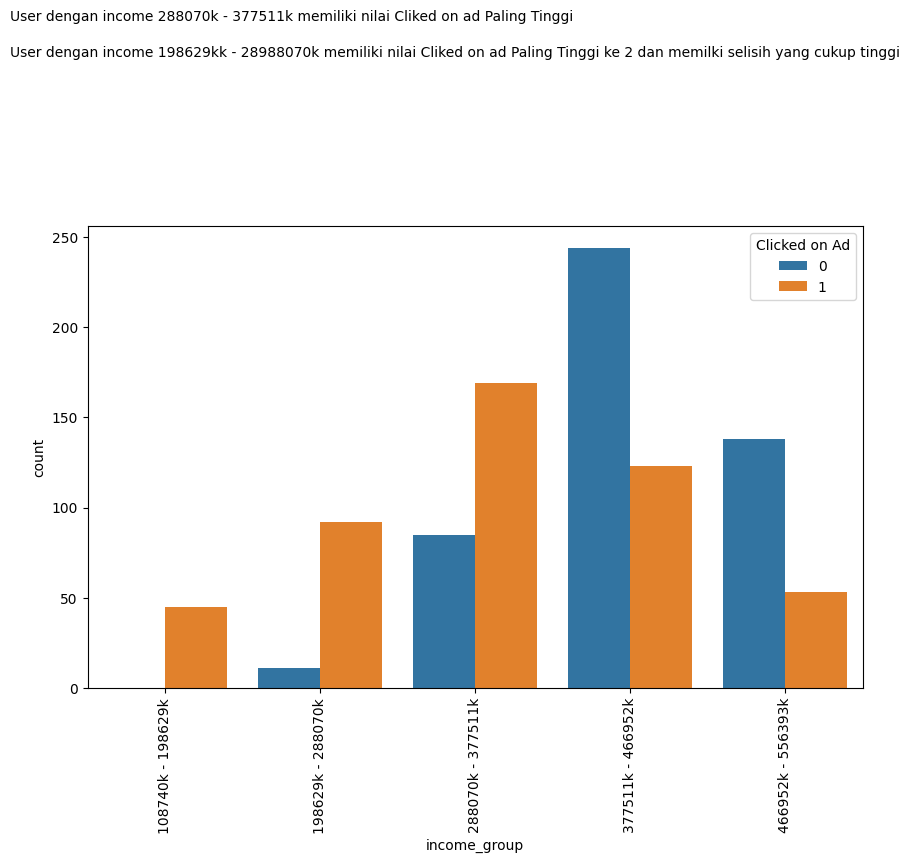

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(x='income_group', data= df_final, hue ='Clicked on Ad')
plt.text(x=-1,y=370,s='User dengan income 288070k - 377511k memiliki nilai Cliked on ad Paling Tinggi')
plt.text(x=-1,y=350,s='User dengan income 198629kk - 28988070k memiliki nilai Cliked on ad Paling Tinggi ke 2 dan memilki selisih yang cukup tinggi')
plt.xticks(rotation=90)
plt.show()

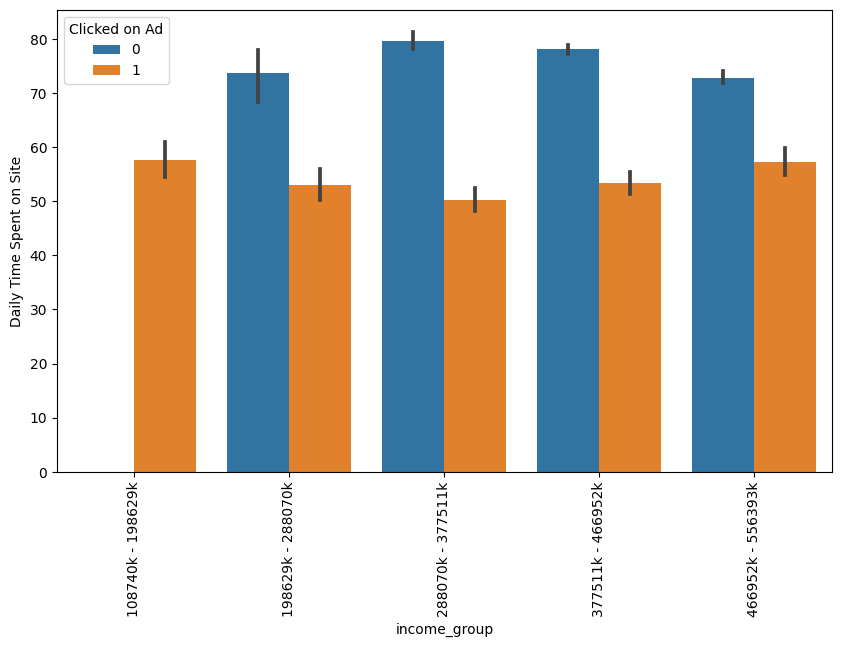

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x='income_group', y= 'Daily Time Spent on Site', data= df_final, hue ='Clicked on Ad')
plt.xticks(rotation=90)
plt.show()


Buisness Reccomendation

Berdasarkan hasil EDA dan feature important, kita dapat merekomendasikan beberapa strategi bisnis:

1. Fokus pada pengguna dengan Age Group Paruh baya dan pra pensiun karena kelompok ini memiliki tingkat klik iklan yang lebih tinggi daripada kelompok usia lainnya.
2. Tingkatkan pengalaman pengguna pada situs web agar pengguna menghabiskan lebih banyak waktu di situs. Hal ini dapat meningkatkan kemungkinan pengguna untuk mengklik iklan pada situs.
3. Fokus pada pengguna yang tinggal di daerah dengan pendapatan 288070k - 377511k dan 198629kk - 28988070k , karena pengguna dari kelompok ini lebih cenderung untuk mengklik iklan pada situs.
4. Fokus pada pengguna yang melakukan time usage lebih daei 50 bisa di berikan promo atau vocher atau juga pemberian notifikasi tambahan pada email atau phone apps

Reccomendation Buisness

1. Targeting pasar yang lebih spesifik dengan iklan yang tepat sasaran
2. Mengoptimalkan penggunaan media sosial dan platform pemasaran online lainnya 3. dengan memanfaatkan SEO (Search Engine Optimization), PPC (Pay Per Click), dan lainnya
4. Menjalin kerjasama dengan influencer dan blogger yang memiliki pengaruh besar di industri yang dituju
5. Membuat konten yang berkualitas dan menarik untuk menarik perhatian audiens
6. Menjaga hubungan baik dengan pelanggan dan memanfaatkan strategi word-of-mouth marketing


Dalam implementasi strategi pemasaran di atas, kita dapat menggunakan hasil dari model machine learning untuk memperkirakan konversi dan mengoptimalkan target pasar. Sebagai contoh, jika model memperkirakan konversi tertinggi pada pengguna dengan usia 30-40 tahun, maka kita dapat mengoptimalkan pemasaran pada kelompok usia tersebut. Demikian pula dengan fitur-fitur lain seperti waktu yang dihabiskan pengguna di situs dan pendapatan area.

Berikut adalah simulasi bisnis dengan menggunakan strategi pemasaran di atas:

Biaya pemasaran: Rp. 20.000.000

Jumlah pengguna yang dijangkau: 50.000

Konversi: 10%

Harga produk/jasa: Rp. 100.000


Dengan asumsi strategi pemasaran yang efektif, kita dapat memperkirakan konversi sebesar 10%, yang berarti jumlah pembelian sebesar 5.000 produk/jasa. Revenue yang dihasilkan sebesar Rp. 500.000.000, dengan biaya pemasaran sebesar Rp. 20.000.000, sehingga profit yang diperoleh adalah Rp. 480.000.000.

Namun perlu diingat bahwa hasil simulasi ini hanyalah perkiraan dan dapat berubah tergantung pada faktor-faktor lain seperti persaingan di pasar, perubahan tren pasar, dan lainnya.


Worst Case Scenario

Untuk simulasi worst scenario, kita dapat mengubah konversi menjadi rendah, misalnya 2%. Dengan asumsi biaya pemasaran dan jumlah pengguna yang dijangkau tetap sama, maka jumlah pembelian hanya sebesar 1.000 produk/jasa. Revenue yang dihasilkan hanya sebesar Rp. 100.000.000, dengan biaya pemasaran sebesar Rp. 20.000.000, sehingga profit yang diperoleh adalah Rp. 80.000.000. Hal ini menunjukkan bahwa ketepatan dalam menentukan target pasar dan strategi pemasaran sangat penting dalam memaksimalkan profit. Jika konversi rendah, maka biaya pemasaran yang telah dikeluarkan tidak akan terbayar dengan hasil revenue yang dihasilkan.